In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Project 7: Image Enhancement (Gamma Correction & Contrast)

### 7.1 Overview
In this project, we enhance a night photograph using gamma correction and contrast adjustment. Night photos often have issues with underexposed dark areas and poor visibility. We'll use gamma correction to brighten dark regions while preserving detail, then increase contrast for a more vivid result.

### 7.2 Objectives

- Apply gamma correction (~1.6) to brighten dark areas
- Visualize the histogram after gamma correction
- Increase contrast slightly for better image quality
- Compare the final result with the original image
---
### 7.3 Step 1: Load and Display the Night Photo

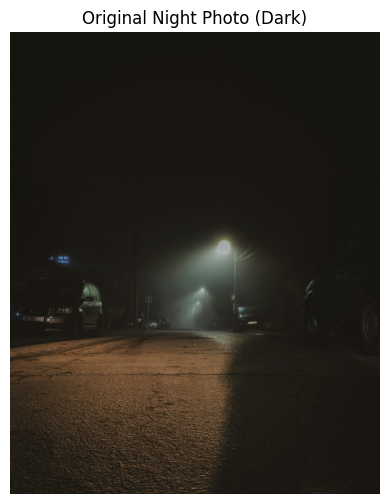

Image dimensions: 3000 x 3750
Min pixel value: 17
Max pixel value: 192
Mean pixel value: 33.85


In [2]:
# Load the night photo
image = cv2.imread('./images/night-photo.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for processing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Night Photo (Dark)")
plt.axis("off")
plt.show()

# Display statistics
print(f"Image dimensions: {image_rgb.shape[1]} x {image_rgb.shape[0]}")
print(f"Min pixel value: {gray_image.min()}")
print(f"Max pixel value: {gray_image.max()}")
print(f"Mean pixel value: {gray_image.mean():.2f}")

### 7.5 Step 2: Apply Gamma Correction (γ ≈ 1.6)

In [3]:
def gamma_correction_chart(image, gamma, verbose=False):
    """ Applies gamma correction to an image and shows the result.

        Args:
            image: Input image
            gamma: Gamma parameter
            verbose: Only show images if this is True

        Returns:
            out_image: Gamma image
    """

    # 1.Transform image to YCrCb color space
    imageYCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # 2.Define gamma correction LUT
    def lut(i):
      return ((i/255)**gamma)*255

    # 3.Apply LUT to first band of the YCrCb image
    imageYCrCb[:,:,0] = lut(imageYCrCb[:,:,0])

    out_image = cv2.cvtColor(imageYCrCb, cv2.COLOR_YCrCb2BGR)

    if verbose:
      
        plt.figure(figsize=(10, 10))
        
        # Show the initial image
        imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, 1)
        plt.title("Original Night Photo")
        plt.axis("off")
        plt.imshow(imageRGB)

        # Show the resultant one
        out_imageRGB = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, 2)
        plt.title(f"After Gamma Correction (γ = {gamma})")
        plt.axis("off")
        plt.imshow(out_imageRGB)
        
        # Create the gamma correction curve
        input_values = np.arange(0, 256, 1)
        output_values_gamma = lut(input_values)
        
        # Also show linear (no correction) for comparison
        output_values_linear = input_values
        
        # Plot the curves
        plt.subplot(2,2, 3)
        plt.title("LUT Used")
        plt.plot(input_values, output_values_linear, 'b--', label='No Correction (γ = 1.0)', linewidth=2)
        plt.plot(input_values, output_values_gamma, 'r-', label=f'Gamma Correction (γ = {gamma})', linewidth=2)
        plt.xlabel('Input Pixel Value')
        plt.ylabel('Output Pixel Value')
        plt.title('Gamma Correction Transformation Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim([0, 255])
        plt.ylim([0, 255])
        

        # Plot histogram comparison
        plt.subplot(2, 2, 4)
        original_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        plt.hist(original_YCrCb[:,:,0].ravel(), bins=256, range=[0, 256], 
                alpha=0.5, label='Before', color='blue')
        plt.hist(imageYCrCb[:,:,0].ravel(), bins=256, range=[0, 256], 
                alpha=0.5, label='After', color='red')
        plt.title("Histogram Comparison")
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()

        plt.show()

    return out_image

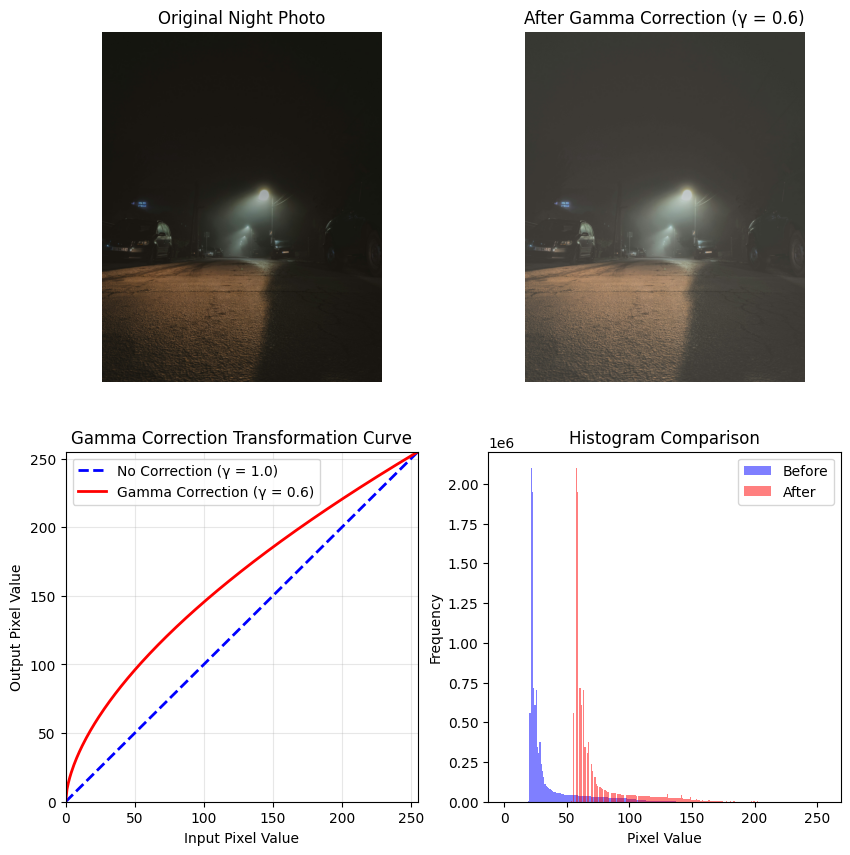

In [4]:
gamma_corrected_image = gamma_correction_chart(image, gamma=0.6, verbose=True)

### 7.6 Step 3: Implementing Histogram Equalization Function to Enhance Contrast

In [5]:
def increase_contrast(image, verbose=False):
    """ 
    Applies histogram equalization to enhance contrast.
    
    Args:
        image: Input image in BGR format
        verbose: If True, displays comparison charts
        
    Returns:
        out_image: Histogram equalized image in BGR format
    """
    
    # Convert to YCrCb Color Space
    imageYCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Extract Y Channel and Calculate Histogram
    firstBand = imageYCrCb[:, :, 0]  
    
    # Calculate histogram: count how many pixels have each intensity [0-255]
    hist, _ = np.histogram(firstBand.ravel(), 256, [0, 256])

   # Normalize the histogram to get probabilities
    pmf = hist / np.sum(hist)    
    
    # Calculate CDF (Cumulative Distribution Function)
    cdf = np.cumsum(pmf)
    
    # Create LUT by Denormalizing CDF
    lut = (cdf * 255).astype(np.uint8)
    
    #Apply LUT to Y Channel
    firstBand = lut[firstBand]
    
    imageYCrCb[:, :, 0] = firstBand  # Put equalized Y channel back

    # Convert Back to BGR
    out_image = cv2.cvtColor(imageYCrCb, cv2.COLOR_YCrCb2BGR)
    
    # Visualization (if verbose=True)
    if verbose:
        plt.figure(figsize=(14, 10))
        
        # Panel 1: Original Histogram
        plt.subplot(2, 2, 1)
        plt.plot(hist, color='darkblue', linewidth=2)
        plt.title("Original Histogram (Y Channel) With Gamma Correction", fontsize=12, fontweight='bold')
        plt.xlabel("Pixel Intensity", fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.xlim([0, 255])
        
        # Panel 2: Equalized Histogram
        hist_eq, _ = np.histogram(firstBand.ravel(), 256, [0, 256])
        plt.subplot(2, 2, 2)
        plt.plot(hist_eq, color='darkgreen', linewidth=2)
        plt.title("Equalized Histogram (Y Channel)", fontsize=12, fontweight='bold')
        plt.xlabel("Pixel Intensity", fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.xlim([0, 255])
        
        # Panel 3: Original Image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image", fontsize=12, fontweight='bold')
        plt.axis("off")
        
        # Panel 4: Equalized Image
        out_imageRGB = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, 4)
        plt.imshow(out_imageRGB)
        plt.title("Histogram Equalized Image", fontsize=12, fontweight='bold')
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
    
    return out_image

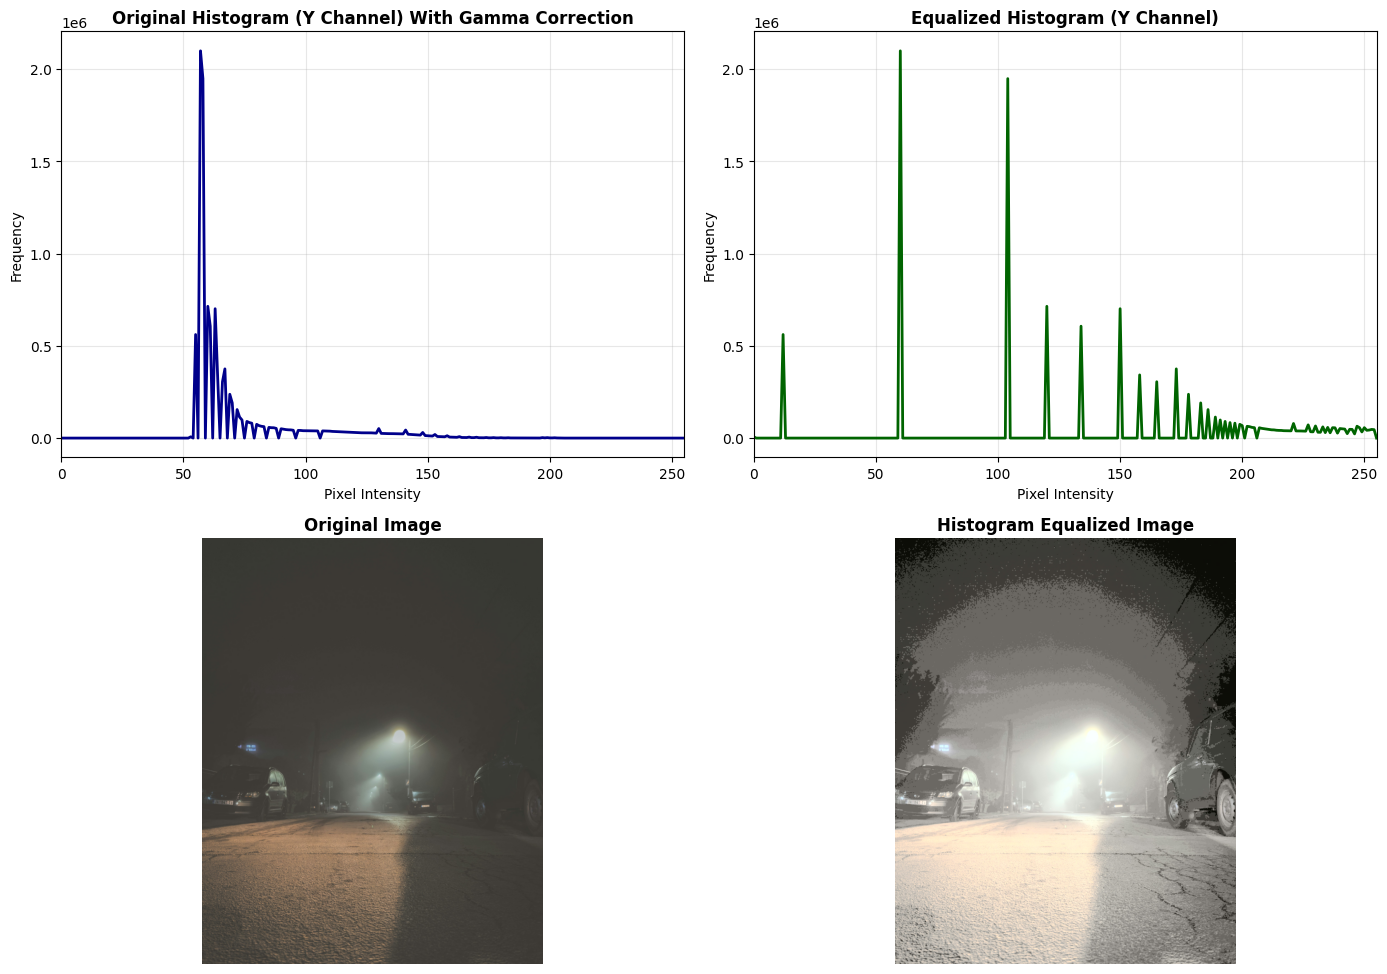

In [6]:
contrast_enhanced_image = increase_contrast(gamma_corrected_image, verbose=True)